### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()

In [12]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)

In [14]:
y = pd.DataFrame(boston.target, columns = ['Price'])

In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [30]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [22]:
from sklearn.manifold import TSNE

In [23]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [24]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [35]:
X_train_tsne

array([[ 2.97641506e+01,  2.09873695e+01],
       [-4.24747753e+00, -1.05048418e+01],
       [-1.88142662e+01, -1.11759501e+01],
       [ 2.22976513e+01,  3.03626900e+01],
       [ 1.73852992e+00, -9.13341045e+00],
       [-9.11401844e+00, -1.16824980e+01],
       [-7.18314266e+00, -1.13112659e+01],
       [-2.71195641e+01, -1.09560461e+01],
       [ 2.35586834e+01,  2.98370991e+01],
       [ 2.21154327e+01,  2.70719757e+01],
       [-7.48745012e+00, -1.18326397e+01],
       [-6.44317818e+00, -3.84728122e+00],
       [-7.40933466e+00,  4.96774942e-01],
       [ 2.14254093e+01,  2.80373745e+01],
       [-9.20851231e+00,  8.65101755e-01],
       [ 6.97665644e+00, -8.96529102e+00],
       [ 4.76356819e-02, -6.78444767e+00],
       [-1.99967651e+01, -1.17451982e+01],
       [-1.69370003e+01, -4.91067171e+00],
       [-1.82409534e+01, -8.73804474e+00],
       [ 2.58343925e+01,  2.55089264e+01],
       [-1.82226837e-01, -3.70452142e+00],
       [-1.09841108e+01, -1.15292959e+01],
       [-6.

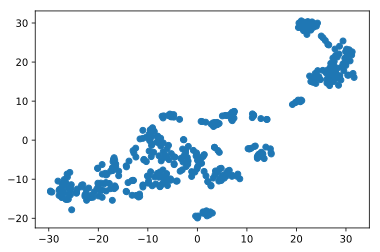

In [31]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [36]:
from sklearn.cluster import KMeans

In [38]:
model = KMeans(n_clusters=3, max_iter = 100, random_state=42)

In [101]:
train_labels = model.fit_predict(X_train_scaled)

In [102]:
train_labels

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [103]:
pd.value_counts(train_labels)

2    191
1    127
0     86
dtype: int64

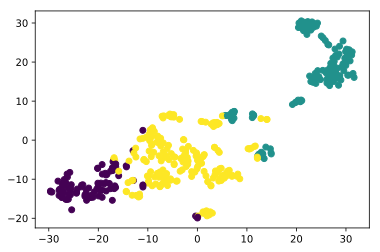

In [105]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [111]:
y_train.loc[train_labels==0,'Price'].mean()

27.788372093023252

In [113]:
y_train.loc[train_labels==1,'Price'].mean()

16.165354330708666

In [114]:
y_train.loc[train_labels==2,'Price'].mean()

24.958115183246072

In [107]:
X_train.loc[train_labels==0, 'CRIM'].mean()

0.07356558139534886

In [108]:
X_train.loc[train_labels==1, 'CRIM'].mean()

10.797028425196853

In [109]:
X_train.loc[train_labels==2, 'CRIM'].mean()

0.42166020942408367

### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [118]:
test_labels = model.predict(X_test_scaled)

In [119]:
pd.value_counts(test_labels)

1    53
2    35
0    14
dtype: int64

In [117]:
y_test.loc[test_labels==0,'Price'].mean()

33.871428571428574

In [121]:
y_test.loc[test_labels==1,'Price'].mean()

21.552830188679245

In [122]:
y_test.loc[test_labels==2,'Price'].mean()

16.437142857142856

In [124]:
X_test.loc[test_labels==0, 'CRIM'].mean()

0.08618571428571427

In [126]:
X_test.loc[test_labels==1, 'CRIM'].mean()

0.25200716981132076

In [127]:
X_test.loc[test_labels==2, 'CRIM'].mean()

10.165531142857143